<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/bi_lstm_PRO_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import yfinance as yf
from keras.initializers import RandomNormal
from keras.layers import Bidirectional

In [2]:


stock_symbol = 'AAPL'
df = yf.download(stock_symbol,period="60mo",interval="1d")
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-11-28  44.182499  45.322498  43.732498  45.235001  43.417042  184250000
2018-11-29  45.665001  45.700001  44.424999  44.887501  43.083504  167080000
2018-11-30  45.072498  45.082500  44.257500  44.645000  42.850761  158126000
2018-12-03  46.115002  46.235001  45.302502  46.205002  44.348068  163210000
2018-12-04  45.237499  45.597500  44.067501  44.172501  42.397247  165377200


Importing Data

In [3]:
df.index = df.index.strftime('%Y-%m-%d')

In [4]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-28,44.182499,45.322498,43.732498,45.235001,43.417042,184250000
2018-11-29,45.665001,45.700001,44.424999,44.887501,43.083504,167080000
2018-11-30,45.072498,45.082500,44.257500,44.645000,42.850761,158126000
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.348068,163210000
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.397247,165377200
...,...,...,...,...,...,...
2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100
2023-11-21,191.410004,191.520004,189.740005,190.639999,190.639999,38134500
2023-11-22,191.490005,192.929993,190.830002,191.309998,191.309998,39617700


In [5]:
len(df)

1257

<Axes: xlabel='Date'>

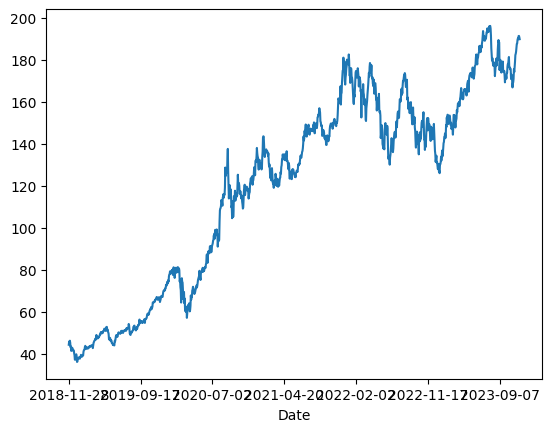

In [6]:
df['Open'].plot()

In [7]:
b_size=32
epoch=200
train_per=0.8
w_size=30
f_size=10

In [8]:
t_size=int(len(df)*train_per)

Normalization

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))


Create target values

In [10]:
data_train = df.iloc[:t_size, 1:2].values
data_test = df.iloc[t_size:, 1:2].values
data_total = df.iloc[:,1:2]#open price
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(data_train)

#Train Data
x_train = []
y_train = []
for iter in range(w_size, t_size):
    x_train.append(training_scaled[iter-w_size:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


#Test data
total_input = data_total[len(data_total) - len(data_test) - w_size:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []
y_test=[]

# Calculate the maximum number of blocks of length w_size that can be created
blocks = len(total_input) - w_size

for iter in range(blocks):
    x_test.append(total_input[iter:iter+w_size, 0])
    y_test.append(total_input[iter+w_size, 0])     #new addition

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


Defining Model

In [11]:
initializer = RandomNormal(mean=0.0, stddev=0.05)
algo = Sequential()
algo.add(Bidirectional(LSTM(60,return_sequences=True,activation='relu',input_shape = (x_train.shape[1], 1),kernel_initializer=initializer)))
algo.add(Dropout(0.2))
algo.add(Bidirectional(LSTM(60)))
algo.add(Dense(1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')



Training Model

In [12]:
algo.fit(x_train, y_train, epochs = epoch, batch_size = b_size, validation_split=0.15,verbose=2)

Epoch 1/200
26/26 - 26s - loss: 0.0553 - val_loss: 0.0047 - 26s/epoch - 981ms/step
Epoch 2/200
26/26 - 2s - loss: 0.0022 - val_loss: 0.0038 - 2s/epoch - 86ms/step
Epoch 3/200
26/26 - 2s - loss: 0.0017 - val_loss: 0.0045 - 2s/epoch - 84ms/step
Epoch 4/200
26/26 - 2s - loss: 0.0015 - val_loss: 0.0044 - 2s/epoch - 88ms/step
Epoch 5/200
26/26 - 3s - loss: 0.0015 - val_loss: 0.0058 - 3s/epoch - 116ms/step
Epoch 6/200
26/26 - 6s - loss: 0.0015 - val_loss: 0.0041 - 6s/epoch - 218ms/step
Epoch 7/200
26/26 - 5s - loss: 0.0013 - val_loss: 0.0035 - 5s/epoch - 201ms/step
Epoch 8/200
26/26 - 5s - loss: 0.0013 - val_loss: 0.0029 - 5s/epoch - 192ms/step
Epoch 9/200
26/26 - 2s - loss: 0.0012 - val_loss: 0.0030 - 2s/epoch - 89ms/step
Epoch 10/200
26/26 - 2s - loss: 0.0011 - val_loss: 0.0034 - 2s/epoch - 84ms/step
Epoch 11/200
26/26 - 2s - loss: 0.0011 - val_loss: 0.0024 - 2s/epoch - 86ms/step
Epoch 12/200
26/26 - 2s - loss: 0.0010 - val_loss: 0.0024 - 2s/epoch - 87ms/step
Epoch 13/200
26/26 - 3s - loss

Dividing Test values into groups

Prediction

In [13]:

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


8/8 [==============================] - 1s 12ms/step


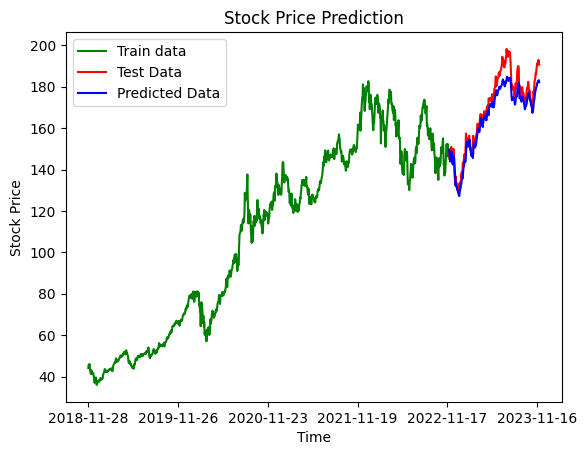

In [14]:
df.reset_index(inplace=True)
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


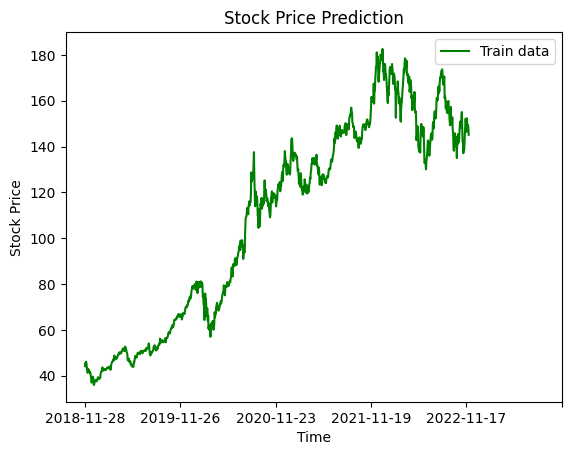

In [15]:
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")

plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

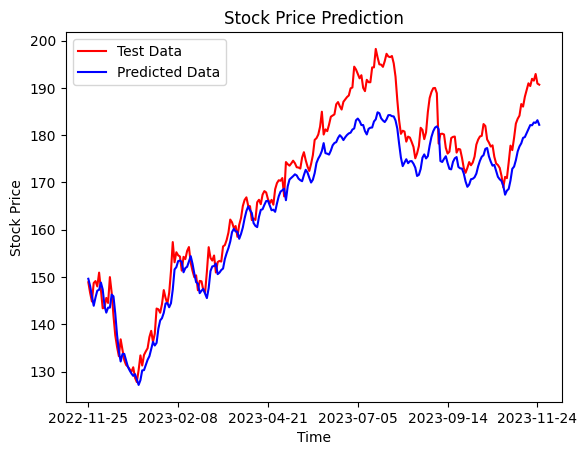

In [16]:
plt.plot(df.loc[t_size:, 'Date'],data_test, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(data_test,predicted_price)

mse = mean_squared_error(data_test, predicted_price)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 4.62
Mean Squared Error (MSE): 32.24
Root Mean Squared Error (RMSE): 5.68


Predict Future

In [18]:
test2=data_test.copy()
for i in range(f_size):
  X=test2[-w_size:]
  X=X.reshape(w_size,1)
  X=sc.fit_transform(X)

  X=np.reshape(X,(1,w_size,1))

  close=algo.predict(X)
  y=sc.inverse_transform(close)

  test2=np.append(test2, y)


1/1 [==============================] - 0s 24ms/step


In [19]:
from datetime import datetime, timedelta
x=df.loc[-1:, 'Date']
day=x[len(x)-1]
date_obj = datetime.strptime(day, '%Y-%m-%d')
start_date = date_obj
date_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(f_size)]

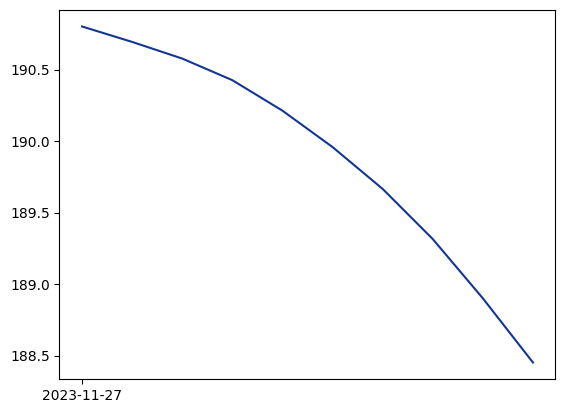

In [20]:
forcasted_data=test2[-f_size:]
plt.plot(date_list,forcasted_data,color="#123692", label="Future data")
plt.xticks(np.arange(0,len(forcasted_data),f_size))
plt.show()

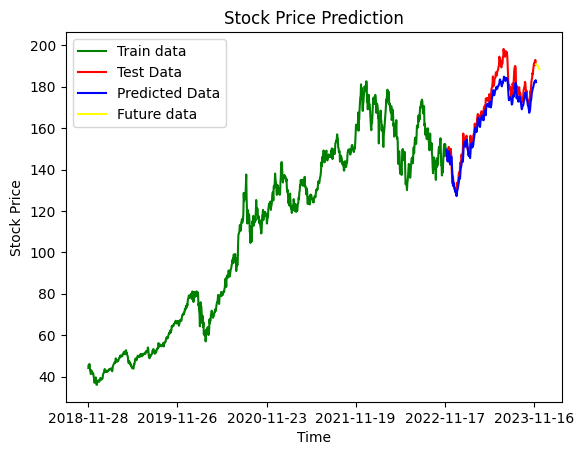

In [21]:

plt.plot(df.loc[:t_size,'Date'],df.loc[:t_size,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

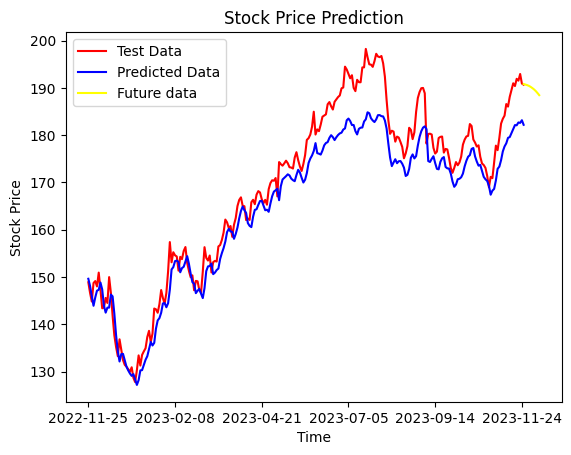

In [22]:
plt.plot(df.loc[t_size:, 'Date'],data_test, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [23]:
algo2 = Sequential()
algo2.add(Bidirectional(LSTM(60,return_sequences=True,activation='relu',input_shape = (x_train.shape[1], 1),kernel_initializer=initializer)))
algo2.add(Dropout(0.2))
algo2.add(Bidirectional(LSTM(60)))
algo2.add(Dense(1))
algo2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
algo2.fit(x_train, y_train, epochs = 50, batch_size = b_size, validation_split=0.15,verbose=2)

Epoch 1/50
26/26 - 11s - loss: 0.0659 - val_loss: 0.0053 - 11s/epoch - 411ms/step
Epoch 2/50
26/26 - 2s - loss: 0.0042 - val_loss: 0.0054 - 2s/epoch - 84ms/step
Epoch 3/50
26/26 - 2s - loss: 0.0020 - val_loss: 0.0057 - 2s/epoch - 84ms/step
Epoch 4/50
26/26 - 2s - loss: 0.0017 - val_loss: 0.0048 - 2s/epoch - 83ms/step
Epoch 5/50
26/26 - 2s - loss: 0.0015 - val_loss: 0.0040 - 2s/epoch - 82ms/step
Epoch 6/50
26/26 - 4s - loss: 0.0015 - val_loss: 0.0043 - 4s/epoch - 139ms/step
Epoch 7/50
26/26 - 2s - loss: 0.0014 - val_loss: 0.0043 - 2s/epoch - 91ms/step
Epoch 8/50
26/26 - 2s - loss: 0.0014 - val_loss: 0.0040 - 2s/epoch - 90ms/step
Epoch 9/50
26/26 - 2s - loss: 0.0012 - val_loss: 0.0038 - 2s/epoch - 83ms/step
Epoch 10/50
26/26 - 2s - loss: 0.0011 - val_loss: 0.0029 - 2s/epoch - 87ms/step
Epoch 11/50
26/26 - 3s - loss: 0.0012 - val_loss: 0.0033 - 3s/epoch - 111ms/step
Epoch 12/50
26/26 - 4s - loss: 0.0012 - val_loss: 0.0045 - 4s/epoch - 136ms/step
Epoch 13/50
26/26 - 2s - loss: 0.0010 - val

In [25]:
predicted_price2 = algo2.predict(x_test)
predicted_price2 = sc.inverse_transform(predicted_price2)

8/8 [==============================] - 1s 12ms/step


In [26]:
mae_2 = mean_absolute_error(data_test,predicted_price2)

mse_2 = mean_squared_error(data_test, predicted_price2)

rmse_2 = np.sqrt(mse_2)

print(f'Mean Absolute Error (MAE): {mae_2:.2f}')
print(f'Mean Squared Error (MSE): {mse_2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_2:.2f}')

Mean Absolute Error (MAE): 21.56
Mean Squared Error (MSE): 703.11
Root Mean Squared Error (RMSE): 26.52


In [27]:
algo3 = Sequential()
algo3.add(Bidirectional(LSTM(30,return_sequences=True,activation='relu',input_shape = (x_train.shape[1], 1),kernel_initializer=initializer)))
algo3.add(Dropout(0.2))
algo3.add(Bidirectional(LSTM(120)))
algo3.add(Dense(1))
algo3.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo3.fit(x_train, y_train, epochs = 75, batch_size = b_size, validation_split=0.15,verbose=2)

Epoch 1/75
26/26 - 11s - loss: 0.0699 - val_loss: 0.0156 - 11s/epoch - 425ms/step
Epoch 2/75
26/26 - 2s - loss: 0.0043 - val_loss: 0.0065 - 2s/epoch - 91ms/step
Epoch 3/75
26/26 - 2s - loss: 0.0021 - val_loss: 0.0065 - 2s/epoch - 91ms/step
Epoch 4/75
26/26 - 2s - loss: 0.0018 - val_loss: 0.0046 - 2s/epoch - 88ms/step
Epoch 5/75
26/26 - 3s - loss: 0.0017 - val_loss: 0.0050 - 3s/epoch - 119ms/step
Epoch 6/75
26/26 - 3s - loss: 0.0017 - val_loss: 0.0041 - 3s/epoch - 114ms/step
Epoch 7/75
26/26 - 2s - loss: 0.0016 - val_loss: 0.0049 - 2s/epoch - 91ms/step
Epoch 8/75
26/26 - 2s - loss: 0.0016 - val_loss: 0.0049 - 2s/epoch - 88ms/step
Epoch 9/75
26/26 - 2s - loss: 0.0016 - val_loss: 0.0033 - 2s/epoch - 86ms/step
Epoch 10/75
26/26 - 3s - loss: 0.0015 - val_loss: 0.0055 - 3s/epoch - 116ms/step
Epoch 11/75
26/26 - 3s - loss: 0.0015 - val_loss: 0.0033 - 3s/epoch - 125ms/step
Epoch 12/75
26/26 - 2s - loss: 0.0014 - val_loss: 0.0033 - 2s/epoch - 92ms/step
Epoch 13/75
26/26 - 2s - loss: 0.0013 - va

In [28]:
predicted_price3 = algo3.predict(x_test)
predicted_price3 = sc.inverse_transform(predicted_price3)

8/8 [==============================] - 1s 12ms/step


In [29]:
mae_3 = mean_absolute_error(data_test,predicted_price3)

mse_3 = mean_squared_error(data_test, predicted_price3)

rmse_3 = np.sqrt(mse_3)

print(f'Mean Absolute Error (MAE): {mae_3:.2f}')
print(f'Mean Squared Error (MSE): {mse_3:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_3:.2f}')

Mean Absolute Error (MAE): 21.19
Mean Squared Error (MSE): 685.80
Root Mean Squared Error (RMSE): 26.19
